```
BEGIN ASSIGNMENT 
init_cell: true 
export_cell: true 
files:
    - d8error.py
    - errorConfig.json
export_cell:
    pdf: false
    force_save: false
solutions_pdf: true
template_pdf: true
generate:
    points_possible: 64.0
    show_stdout: true
    filtering: true
    pagebreaks: true
    zips: false
```


# Homework 9: Sample Sizes and Confidence Intervals

**Helpful Resource:**

- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [Estimation](https://inferentialthinking.com/chapters/13/Estimation.html)
* [Why the Mean Matters](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Bounding the Tail of a Distribution

A community has an average age of 45 years with a standard deviation of 5 years.

In each part below, fill in the blank with a percent that makes the statement true **without further assumptions**, and explain your answer.

*Note:* No credit will be given for loose bounds such as "at least 0%" or "at most 100%". Give the best answer that is possible with the information given.

**Question 1.1.** At least _______% of the people are between 25 and 65 years old. **(6 Points)**

```
BEGIN QUESTION
name: q1_1
manual: true
```

**SOLUTION:** 93.75; Since we cannot make further assumptions about the *distribution* of ages within the community (i.e. we cannot assume them to be normally distributed), we must use Chebyshev’s inequality to create a bound on the variability. Since we know that the mean of the ages is 45 with an standard deviation of 5, we see that 25 is -4 SDs from the mean and 65 is +4 SDs from the mean. Chebyshev’s tells us that +/-4 SDs from the mean covers at least 93.75% of the people in the distribution.

**Question 1.2.** At most _______% of the people have ages that are not in the range 25 years to 65 years. **(6 Points)**

```
BEGIN QUESTION
name: q1_2
manual: true
```

**SOLUTION:** 6.25; Since the total percentage of people within the community is 100%, and since we know that at least 93.75% of the people are between 25 and 65 years old, we can substract 100% - 93.75% = 6.25% to get the maximum number of people that are not in the range 25 to 65 years old. We know that this translates to there being *at most* 6.25% of people outside of the range [25,65] because Chebyshev tells us that *at least* 93.75% within the range (i.e. the percentage could be higher than this 93.75%).

**Question 1.3.** At most _______% of the people are more than 65 years old. **(6 Points)**

*Hint:* If you're stuck, try thinking about what the distribution may look like in this case.

```
BEGIN QUESTION
name: q1_3
manual: true
```

**SOLUTION:** 6.25; Question 1.2 tells us that “At most 6.25% of the people have ages that are not in the range 25 years to 65 years”. We don’t know anything about the distributions of this 6.25% of people, but we do know that we would *maximize* the number of people that were more than 65 years old if we put ALL 6.25% of people that weren’t in the range [25 year, 65 years]. In this case, there would be no one that was less than 20 years. Thus, this extreme tells us that at most 6.25% of the people are more than 65 years old.

## 2. Sample Size and Confidence Level

A data science class at the large Data 8 University wants to estimate the percent of Facebook users among students at the school. To do this, they need to take a random sample of students. You can assume that their method of sampling is equivalent to drawing at random with replacement from students at the school.

***Please review [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook before proceeding with this section. Your work will go much faster that way!***

**Question 2.1.** Assign `smallest` to the smallest number of students they should sample to ensure that a **95%** confidence interval for the parameter has a width of no more than 6% from left end to right end. **(6 points)**

*Hint:* How can our data be represented to show if a student in the sample is a Facebook user? Given this, what assumptions can we make for the SD of the population? [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) might be helpful!

*Note:* While the true smallest sample size would have to be an integer, please leave your answer in decimal format for the sake of our tests.

```
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 6
```

In [2]:
smallest = (4 * 0.5/0.06)**2 # SOLUTION
smallest

1111.1111111111113

In [3]:
# TEST
1100 <= smallest <= 1150

True

In [4]:
# HIDDEN TEST
np.isclose(smallest, 1111.1111111111113)

True

**Question 2.2.** Suppose the data science class decides to construct a 90% confidence interval instead of a 95% confidence interval, but they still require that the width of the interval is no more than 6% from left end to right end. Will they need the same sample size as in 2.1? Pick the right answer and explain further without calculation. **(6 Points)**

1. Yes, they must use the same sample size.
2. No, a smaller sample size will work.
3. No, they will need a bigger sample.

```
BEGIN QUESTION
name: q2_2
manual: true
```

**SOLUTION:** 2; In terms of standard deviations, the width of a 90% confidence interval is smaller than a 95% confidence interval. We know that we need to look +/- 2 SDs from the mean for our 95% CI. Thus, the number of deviations we have to look left and right will be less for our 90% CI.

However, this question requires that both intervals have a width at most 0.06. To achieve this, we would have to take a larger sample size for our 95% CI. Thus, for our 90% CI, we could take a smaller sample size than what we needed for our 95% CI.

Algebraically, we can think about it in the following way:
$$\text{Desired Width} \geq 4\cdot \frac{\text{Pop SD}}{\sqrt{\text{Sample Size}}}$$

The above equation works for constructing a 95% CI. We want a width at most 0.06. Let’s rearrange the above equation to solve for sample size:

$$\text{Sample Size} \geq (4\cdot \frac{\text{Pop SD}}{0.06})^2$$

The 4 in the above equation is unique to a 95% CI. As we mentioned before, if we chose to construct a 90% CI instead, we would need less than four SDs as our width. Clearly, if we swapped the 4 on the righthand side of the above equation with something less than 4, say 3, the sample size needed would decrease.

**Question 2.3.** The professor tells the class that a 90% confidence interval for the parameter is constructed exactly like a 95% confidence interval, except that you have to go only 1.65 SDs on either side of the estimate (±1.65) instead of 2 SDs on either side (±2). Assign `smallest_num` to the smallest number of students they should sample to ensure that a **90%** confidence interval for the parameter has a width of no more than 6% from left end to right end. **(6 points)**

*Note:* While the true smallest sample size would have to be an integer, please leave your answer in decimal format for the sake of our tests.

```
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 6
```

In [5]:
smallest_num = (2 * 1.65 * 0.5/0.06)**2 # SOLUTION
smallest_num

756.25

In [6]:
# TEST
700 <= smallest_num <= 800

True

In [7]:
# HIDDEN TEST
np.isclose(smallest_num, 756.25)

True

For this next exercise, please consult [Section 14.3.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf) of the textbook for similar examples.

The students are curious about how the professor came up with the value 1.65 in Question 2.3. She says she ran the following two code cells. The first one calls the `datascience` library function `plot_normal_cdf`, which displays the proportion that is at most the specified number of SDs above average under the normal curve plotted with standard units on the horizontal axis. You can find the documentation [here](http://data8.org/datascience/util.html#datascience.util.plot_normal_cdf).

*Note:* The acronym `cdf` stands for `cumulative distribution function`. It measures the proportion to the left of a specified point under a probability histogram.

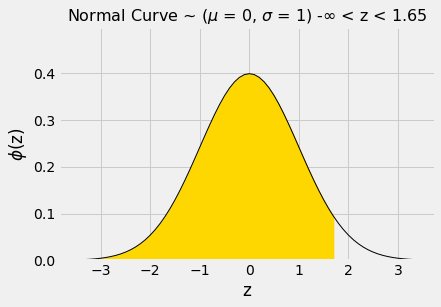

In [8]:
plot_normal_cdf(1.65)

To run the second cell, the professor had to first import a Python library for probability and statistics:

In [9]:
# Just run this cell
from scipy import stats

Then she used the `norm.cdf` method in the library to find the gold proportion above.

In [10]:
# Just run this cell
stats.norm.cdf(1.65)

0.9505285319663519

*Note*: You do not need to understand how the `scipy` library or how to use the method yourself.

**Question 2.4.** This shows that the percentage in a normal distribution that is at most 1.65 SDs above average is about **95%**. Explain why 1.65 is the right number of SDs to use when constructing a **90%** confidence interval. **(6 Points)**

```
BEGIN QUESTION
name: q2_4
manual: true
```

**SOLUTION:** The level of confidence is a central area. On the left hand side, the confidence interval will stop at 1.65 SDs below the center. That is, it will stop at -1.65 in standard units. Since the area to the right of 1.65 is 5%, the area below -1.65 is also 5%, so the area between -1.65 and 1.65 is 90%.

In [11]:
# Just run this cell, do not change it.
stats.norm.cdf(2.33)

0.9900969244408357

**Question 2.5.** The cell above shows that the proportion that is at most 2.33 SDs above average in a normal distribution is 99%. Assign `option` to the right option to fill in the blank: **(6 points)**

If you start at the estimate and go 2.33 SDs on either side, then you will get a _______% confidence interval for the parameter.

1. 99.5
2. 99
3. 98.5
4. 98

```
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 6
```


In [12]:
option = 4 # SOLUTION
option

4

In [13]:
# TEST
type(option) == int

True

In [14]:
# HIDDEN TEST
option == 4

True

## 3. Polling and the Normal Distribution

In [15]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal and vertical axes) called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. We have provided a table for you below which has 3 columns: the first two columns are identical to `sample`. The third column contains the proportion of total voters that chose each option.

In [16]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))

sample_size = sum(sample.column("Count"))
sample_with_proportions = sample.with_column("Proportion", sample.column("Count") / sample_size)
sample_with_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


**Question 3.1.** Michelle wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  

Fill in the next cell to simulate an empirical distribution of Yes proportions. Use bootstrap resampling to simulate 10,000 election outcomes, and assign `resample_yes_proportions` to contain the Yes proportion of each bootstrap resample. Then, visualize `resample_yes_proportions` with a histogram. **You should see a bell shaped curve centered near the proportion of Yes in the original sample.** **(6 points)**

*Hint:* `sample_proportions` may be useful here!

```
BEGIN QUESTION
name: q3_1
manual: false
points:
 - 1
 - 5
```

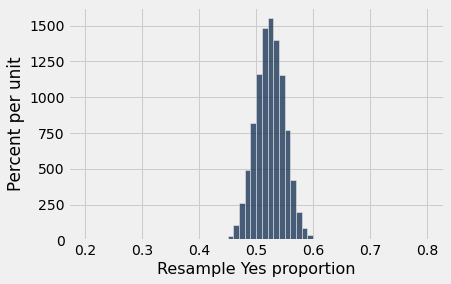

In [17]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = sample_proportions(sample_size, sample_with_proportions.column("Proportion")) #SOLUTION
    resample_yes_proportions = np.append(resample_yes_proportions, resample.item(0)) #SOLUTION
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

In [18]:
# TEST
len(resample_yes_proportions) == 10000

True

In [19]:
# TEST
abs(np.mean(resample_yes_proportions) - .525) < .025 and np.std(resample_yes_proportions) < .08

True

**Question 3.2.** Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above? **(6 points)**

```
BEGIN QUESTION
name: q3_2
manual: true
```

**SOLUTION:** If we think of Yes votes as 1 and No votes as 0, then the sample is a collection of numbers.  A resample is sampled with replacement from that collection, so a resample mean is the mean of a sample with replacement from some collection of numbers.  The CLT therefore applies to the resample means: across resamples, they will have an approximately normal distribution.  That's why the histogram above is bell-shaped.

In a population whose members are 0 and 1, there is a simple formula for the **standard deviation of that population**:

$$\text{standard deviation of population} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

**Question 3.3.** Using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, *algebraically* compute the predicted standard deviation of the `resample_yes_proportions` array. Assign this number to `approximate_sd`. **Do not access the data in `resample_yes_proportions` in any way.** **(6 points)**

Remember that the standard deviation of the sample means can be computed from the population SD and the size of the sample (the formula above might be helpful). If we do not know the population SD, we can use the sample SD as a reasonable approximation in its place. [This section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means) of the textbook also may be helpful.

```
BEGIN QUESTION
name: q3_3
manual: false
points:
 - 0
 - 6
```

In [20]:
approx_pop_sd = (190/400 * 210/400) ** 0.5 # SOLUTION
approximate_sd = approx_pop_sd / (400 ** 0.5) # SOLUTION
approximate_sd

0.024968730444297725

In [21]:
# TEST
approximate_sd < 0.025

True

In [22]:
# HIDDEN TEST
np.isclose(approximate_sd, ((210/400) * (190/400) / 400) ** 0.5)

True

**Question 3.4.** Compute the standard deviation of the array `resample_yes_proportions`, which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to question 3.3 is approximately correct. **(6 points)**

```
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 0
 - 6
```

In [23]:
exact_sd = np.std(resample_yes_proportions) #SOLUTION
exact_sd

0.025231711153823878

In [24]:
# TEST
exact_sd < 0.05

True

In [25]:
# HIDDEN TEST
0.02 <= exact_sd <= 0.03

True

**Question 3.5.** **Again, without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California. **(6 points)**

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs corresponds to 95% of the distribution promised by the CLT? Recall the discussion in the textbook [here](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

*Hint:* The `approximate_sd` variable you previously defined may be helpful!

```
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 3
 - 3
```

In [26]:
lower_limit = 210/400 - 2*approximate_sd #SOLUTION
upper_limit = 210/400 + 2*approximate_sd #SOLUTION
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.47506253911140456 upper: 0.5749374608885954


In [27]:
# TEST
0.4 <= lower_limit < upper_limit <= 0.7

True

In [28]:
# HIDDEN TEST
np.isclose(lower_limit, 0.47506253911140456)

True

In [29]:
# HIDDEN TEST
np.isclose(upper_limit, 0.5749374608885954)

True

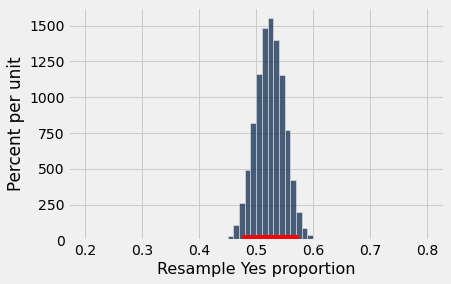

In [30]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plt.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

<div class="hide">\pagebreak</div>
Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

**Question 3.6.** Does Michelle's sample size achieve the desired standard deviation of sample means? What SD would you achieve with a smaller sample size? A higher sample size?

To explore this, first compute the SD of sample means obtained by using Michelle's sample size. **(6 points)**

```
BEGIN QUESTION
name: q3_6
manual: false
points:
 - 0
 - 2
 - 2
 - 2
```

In [31]:
estimated_population_sd = np.sqrt((210/400)*(1 - 210/400)) #SOLUTION
michelle_sample_size = 9975 #SOLUTION
michelle_sample_mean_sd = estimated_population_sd/(michelle_sample_size**.5) #SOLUTION
print("With Michelle's sample size, you would predict a sample mean SD of %f." % michelle_sample_mean_sd)

With Michelle's sample size, you would predict a sample mean SD of 0.005000.


In [32]:
# TEST
type(michelle_sample_size) == int

True

In [33]:
# HIDDEN TEST
np.isclose(estimated_population_sd, 0.4993746088859545)

True

In [34]:
# HIDDEN TEST
michelle_sample_size == 9975

True

In [35]:
# HIDDEN TEST
np.isclose(michelle_sample_mean_sd, .005)

True

**Question 3.7.** Next, compute the SD of sample means that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Michelle's will do. **(5 points)**

```
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 1
 - 4
```

In [36]:
smaller_sample_size = 5000 #SOLUTION
smaller_sample_mean_sd = estimated_population_sd/(smaller_sample_size**.5) #SOLUTION
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_sd)

With this smaller sample size, you would predict a sample mean SD of 0.007062


In [37]:
# TEST
smaller_sample_size < michelle_sample_size

True

In [38]:
# HIDDEN TEST
smaller_sample_mean_sd > .005

True

**Question 3.8.** Finally, compute the SD of sample means that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Michelle's will do. **(5 points)**


```
BEGIN QUESTION
name: q3_8
manual: false
points:
 - 1
 - 4
```

In [39]:
larger_sample_size = 15000 #SOLUTION
larger_sample_mean_sd = estimated_population_sd/(larger_sample_size**.5) #SOLUTION
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_sd)

With this larger sample size, you would predict a sample mean SD of 0.004077


In [40]:
# TEST
larger_sample_size > michelle_sample_size

True

In [41]:
# HIDDEN TEST
larger_sample_mean_sd < .005

True

**Question 3.9.** Based off of this, was Michelle's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if 9,975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't. **(4 points)**

```
BEGIN QUESTION
name: q3_9
manual: false
points:
 - 0
 - 4
```

In [42]:
min_sufficient = True #SOLUTION
min_sufficient

True

In [43]:
# TEST
min_sufficient or not min_sufficient 

True

In [44]:
# HIDDEN TEST
min_sufficient

True

## 4. Mid-Semester Survey

Once you have submitted, please also take the time to complete the Mid-Semester Survey! We
really appreciate your honest feedback and it helps us improve the course!

The Mid-Semester survey is linked here: https://forms.gle/mg3E97WckJsiM5xa8

**Question 4.1.** Fill out the mid-semester survey linked above. Once you have submitted, a secret word will be displayed. Set `secret_word` to the secret string at the end of the form. **(2 points)**


```
BEGIN QUESTION
name: q4_1
manual: false
points:
 - 0
 - 2
```

In [45]:
secret_word = "doggo8" # SOLUTION

In [46]:
# TEST
# Make sure secret_word is assigned to a string!
type(secret_word) == str

True

In [47]:
# HIDDEN TEST
secret_word == "doggo8"

True

You're done with Homework 9!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**